In [10]:
## AND 연산과 OR 연산에 학습이 가능한지를 알아보아요!
## Logistic Regression
import tensorflow as tf

# 1. training data set
x_data = [[0,0],
          [0,1],
          [1,0],
          [1,1]]
# y_data = [[0],[0],[0],[1]]  # AND Operation
# y_data = [[0],[1],[1],[1]]  # OR operation
y_data = [[0],[1],[1],[0]]  # XOR operation
# 2. placeholder
X = tf.placeholder(shape=[None,2], dtype=tf.float32)
Y = tf.placeholder(shape=[None,1], dtype=tf.float32)
# 3. Weight & bias
W = tf.Variable(tf.random_normal([2,1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")
# 4. Hypothesis
logit = tf.matmul(X,W) + b
H = tf.sigmoid(logit)
# 5. Cost function
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logit, 
                                                              labels=Y))
# 6. train
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# 7. session, 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 8. 학습
for step in range(30000):
    _, cost_val = sess.run([train,cost], feed_dict={X:x_data,
                                                    Y:y_data})
    if step % 3000 == 0:
        print("Cost : {}".format(cost_val))
# 9. accuracy
predict = tf.cast(H > 0.5, dtype=tf.float32)
correct = tf.equal(predict, Y)
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))

print("정확도 : {}".format(sess.run(accuracy, 
                                 feed_dict={X:x_data, 
                                            Y:y_data})))


Cost : 0.7425564527511597
Cost : 0.6954735517501831
Cost : 0.6933144927024841
Cost : 0.6931617856025696
Cost : 0.6931485533714294
Cost : 0.6931473016738892
Cost : 0.6931471824645996
Cost : 0.6931471824645996
Cost : 0.6931471824645996
Cost : 0.6931471824645996
정확도 : 0.25


In [18]:
### Multiple layer를 이용한 XOR문제 해결
import tensorflow as tf

# 1. training data set
x_data = [[0,0],
          [0,1],
          [1,0],
          [1,1]]
y_data = [[0],[1],[1],[0]]

# placeholder
X = tf.placeholder(shape=[None,2], dtype=tf.float32)
Y = tf.placeholder(shape=[None,1], dtype=tf.float32)

# Weight & bias
W1 = tf.Variable(tf.random_normal([2,256]), name="weight1")
b1 = tf.Variable(tf.random_normal([256]), name="bias1")
layer1 = tf.sigmoid(tf.matmul(X,W1) + b1)

W2 = tf.Variable(tf.random_normal([256,512]), name="weight2")
b2 = tf.Variable(tf.random_normal([512]), name="bias2")
layer2 = tf.sigmoid(tf.matmul(layer1,W2) + b2)

W3 = tf.Variable(tf.random_normal([512,1]), name="weight3")
b3 = tf.Variable(tf.random_normal([1]), name="bias3")

# Hypothesis
logit = tf.matmul(layer2,W3) + b3
H = tf.sigmoid(logit)

# Cost function
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logit, 
                                                              labels=Y))
# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# session, 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(30000):
    _, cost_val = sess.run([train,cost], feed_dict={X:x_data,
                                                    Y:y_data})
    if step % 3000 == 0:
        print("Cost : {}".format(cost_val))
        
# accuracy
predict = tf.cast(H > 0.5, dtype=tf.float32)
correct = tf.equal(predict, Y)
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))

print("정확도 : {}".format(sess.run(accuracy, 
                                 feed_dict={X:x_data, 
                                            Y:y_data})))

Cost : 4.474294662475586
Cost : 0.00020849495194852352
Cost : 0.00012202482321299613
Cost : 8.729781984584406e-05
Cost : 6.843328446848318e-05
Cost : 5.6556673371233046e-05
Cost : 4.835074651055038e-05
Cost : 4.2337407649029046e-05
Cost : 3.7725625588791445e-05
Cost : 3.408309567021206e-05
정확도 : 1.0


In [7]:
### MNIST - Multinomial Classification
### learning_rate = 0.1 => 90%
### learning_rate = 0.01 => 83%
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf

### 1. Data Loading
mnist = input_data.read_data_sets("./data/mnist", one_hot=True)

### 2. Placeholder
X = tf.placeholder(shape=[None,784], dtype=tf.float32)
Y = tf.placeholder(shape=[None,10], dtype=tf.float32)

# 3. Weight & bias
W = tf.Variable(tf.random_normal([784,10]), name="weight")
b = tf.Variable(tf.random_normal([10]), name="bias")

# 4. Hypothesis
logit = tf.matmul(X,W) + b
H = tf.nn.softmax(logit)   # 확률값으로 결과를 얻기위해

# 5. cost function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, 
                                                                 labels=Y))
# 6. train
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# 7. session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 8. 학습
train_epoch = 30
batch_size = 100 # 한번에 읽어들일 데이터의 크기

for step in range(train_epoch):
    num_of_iter = int(mnist.train.num_examples / batch_size)
    
    for i in range(num_of_iter):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([train,cost],feed_dict={X:batch_x,
                                                      Y:batch_y})
    if step % 3 == 0:
        print("Cost : {}".format(cost_val)) 
        
# accuracy
predict = tf.argmax(H,1)
correct = tf.equal(predict, tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))

# 정확도 출력
print("정확도 : {}".format(sess.run(accuracy,feed_dict={X:mnist.test.images,
                                                    Y:mnist.test.labels})))

Extracting ./data/mnist\train-images-idx3-ubyte.gz
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz
Cost : 6.9437575340271
Cost : 2.1060941219329834
Cost : 1.7643548250198364
Cost : 1.4535472393035889
Cost : 1.4440171718597412
Cost : 1.5990337133407593
Cost : 0.9881365895271301
Cost : 0.8555994629859924
Cost : 0.906221330165863
Cost : 0.734693169593811
정확도 : 0.8335999846458435


In [1]:
%%time
### MNIST - Neural Network ( wide & deep )
### Wall time: 1min 2s
### Wall time: 1min 19s
###         => Sigmoid => ReLU로 변경
###         => Xavier initialization을 도입해서 초기 W값 지정
###         => overfitting을 피하기 위해 dropout을 도입
### learning_rate = 0.1 => 91.7% => X => 97% => 98%
### learning_rate = 0.01 => 86% => 93.9% => 95.8%
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf

tf.reset_default_graph()

### 1. Data Loading
mnist = input_data.read_data_sets("./data/mnist", one_hot=True)

### 2. Placeholder
X = tf.placeholder(shape=[None,784], dtype=tf.float32)
Y = tf.placeholder(shape=[None,10], dtype=tf.float32)

# 3. Weight & bias
keep = tf.placeholder(dtype=tf.float32)
W1 = tf.get_variable("weight1", shape=[784,256], 
            initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256]), name="bias1")
_layer1 = tf.nn.relu(tf.matmul(X,W1) + b1)
layer1 = tf.nn.dropout(_layer1, keep_prob=keep)

W2 = tf.get_variable("weight2", shape=[256,512], 
                    initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]), name="bias2")
_layer2 = tf.nn.relu(tf.matmul(layer1,W2) + b2)
layer2 = tf.nn.dropout(_layer2, keep_prob=keep)

W3 = tf.get_variable("weight3", shape=[512,10], 
                    initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([10]), name="bias3")

# 4. Hypothesis
H = tf.matmul(layer2,W3) + b3
# H = tf.nn.softmax(logit)

# 5. cost function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=H, 
                                                                 labels=Y))
# 6. train
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# 7. session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 8. 학습
train_epoch = 30
batch_size = 100 # 한번에 읽어들일 데이터의 크기

for step in range(train_epoch):
    num_of_iter = int(mnist.train.num_examples / batch_size)
    
    for i in range(num_of_iter):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([train,cost],feed_dict={X:batch_x,
                                                      Y:batch_y,
                                                      keep:0.7})
    if step % 3 == 0:
        print("Cost : {}".format(cost_val)) 
        
# accuracy
predict = tf.argmax(H,1)
correct = tf.equal(predict, tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))

# 정확도 출력
print("정확도 : {}".format(sess.run(accuracy,feed_dict={X:mnist.test.images,
                                                    Y:mnist.test.labels,
                                                    keep:1})))

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./data/mnist\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Cost : 0.4852394759654999
Cost : 0.14110228419303894
Cost : 0.06159446761012077
Cost : 0.09411464631557465
Cost : 0.07455004751682281
Cost : 0.07074318826198578
Cost : 0.07937780022621155
Cost : 0.0967945009469986
Cost : 0.03138711303472519
Cost : 0.01914205402135849
정확도 : 0.9821000099182129


In [1]:
import tensorflow as tf
tf.test.is_gpu_available()

True

In [2]:
import tensorflow as tf
import numpy as np

# image의 shape => (1,3,3,1) => (이미지개수,가로,세로,color)
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]],
                   [[7],[8],[9]]
                  ]], dtype=np.float32)
image = tf.reshape(image, [1,3,3,1])

# filter의 shape => (2,2,1,3) => (가로,세로,color,필터개수)
# W = np.array([[[[1,10,-1]],
#                [[1,10,-1]]],
#                [[[1,10,-1]],
#                [[1,10,-1]]]], dtype=np.float32)
# 이미지와 filter를 이용해서 convolution을 생성
# conv2d = tf.nn.conv2d(image, W, strides=[1,1,1,1],
#                      padding="VALID")
# conv2d = tf.nn.relu(conv2d)
conv2d = tf.layers.conv2d(inputs=image, 
                          filters=32,
                          strides=1,
                          activation=tf.nn.relu,
                          kernel_size=[2,2],
                          padding="SAME")
sess = tf.Session()
sess.run(tf.global_variables_initializer())
sess.run(conv2d)

array([[[[1.4250777 , 0.        , 0.16436276, 0.        , 0.        ,
          0.792048  , 0.2986828 , 0.7521249 , 0.6876709 , 0.24627063,
          0.        , 0.        , 1.3901913 , 0.41779146, 0.14644326,
          0.        , 0.7909863 , 0.        , 0.2326116 , 0.        ,
          0.        , 0.        , 0.        , 0.7903572 , 0.21789292,
          0.24387664, 0.        , 0.        , 0.        , 0.87844276,
          0.        , 0.48172048],
         [1.8955672 , 0.        , 0.2686035 , 0.        , 0.        ,
          0.9835886 , 0.45475066, 0.9452087 , 0.9789232 , 0.26890695,
          0.        , 0.        , 1.6595421 , 0.33861655, 0.2043468 ,
          0.        , 1.0016553 , 0.        , 0.46489787, 0.        ,
          0.        , 0.        , 0.        , 1.0222609 , 0.2554988 ,
          0.3396501 , 0.        , 0.        , 0.        , 0.98384947,
          0.        , 0.5204728 ],
         [0.9143663 , 0.        , 0.        , 0.        , 0.        ,
          0.        

In [5]:
import tensorflow as tf
import numpy as np

# image => (1,2,2,1)
images = np.array([
                    [
                        [
                            [4],
                            [3]
                        ],
                        [
                            [1],
                            [2]
                        ]
                    ]
                  ], dtype=np.float32)
images.shape
pool = tf.nn.max_pool(images,ksize=[1,2,2,1],
                      strides=[1,1,1,1], padding="SAME")
sess.run(pool)

array([[[[4.],
         [3.]],

        [[2.],
         [2.]]]], dtype=float32)

Extracting ./data/mnist\train-images-idx3-ubyte.gz
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz


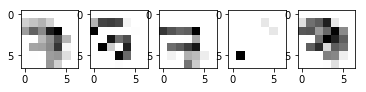

In [7]:
### MNIST 이미지 1장으로 Convolution과 MAX Pooling처리
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt

## 1. Data Loading
mnist = input_data.read_data_sets("./data/mnist", one_hot=True)

## 2. 처음 1장의 이미지만 가지고 해 보아요!!
img = mnist.train.images[0]
# plt.imshow(img.reshape(28,28), cmap="Greys")
# plt.show()
## 3. Convolution
## 원본데이터의 형태부터 변경해줘야 해요!
img = tf.reshape(img, shape=[-1,28,28,1])
## 필터를 정의해줘야 해요!! ( 필터크기 :3x3, 필터개수:5)
W = tf.Variable(tf.random_normal([3,3,1,5]))
conv2d = tf.nn.conv2d(img, W, strides=[1,2,2,1], 
                      padding="SAME")
# tf.nn.relu
conv2d = tf.nn.relu(conv2d)
# MAX Pooling (sub sampling)
pool = tf.nn.max_pool(conv2d, ksize=[1,2,2,1], 
                      strides=[1,2,2,1], padding="SAME")
sess = tf.Session()
sess.run(tf.global_variables_initializer())

result = sess.run(pool)
result.shape # (1, 14, 14, 5) => conv2d
             # (1, 7, 7, 5)  

## 결과이미지를 출력해보기 위해서 데이터 처리를 약간 진행
## 결과이미지의 axes를 변경해서 (5,14,14,1)
result = np.swapaxes(result,0,3)
fig, axes = plt.subplots(1,5)
for idx, t_img in enumerate(result):
    axes[idx].imshow(t_img.reshape(7,7), cmap="Greys")
plt.show()


In [2]:
#### MNIST with CNN
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf

tf.reset_default_graph()

# 1. Data Loading
mnist = input_data.read_data_sets("./data/mnist", one_hot=True)

# 2. placeholder
X = tf.placeholder(shape=[None,784], dtype=tf.float32)
Y = tf.placeholder(shape=[None,10], dtype=tf.float32)
keep_rate = tf.placeholder(dtype=tf.float32) # dropout 비율

# 3. Convolution Layer
# 3.1 Convolution Layer 1
#     입력데이터의 형태를 Convolution할 수 있도록 4차배열로
#     reshape (None,784) => 
X_img = tf.reshape(X, shape=[-1,28,28,1])
#     Filter를 생성
W1 = tf.Variable(tf.random_normal([3,3,1,32], stddev=0.01))
#     Convolution
L1 = tf.nn.conv2d(X_img, W1, strides=[1,1,1,1], padding="SAME")
#     ReLU
L1 = tf.nn.relu(L1)
#     MAX Pooling
L1 = tf.nn.max_pool(L1, ksize=[1,2,2,1], 
                    strides=[1,2,2,1], padding="SAME")
# 3.2 Convolution Layer 2
#     Filter, Convolution, ReLU
L2 = tf.layers.conv2d(inputs=L1, filters=64, 
                      kernel_size=[3,3], padding="SAME",
                      strides=1, activation=tf.nn.relu)
#     MAX Pooling
L2 = tf.layers.max_pooling2d(inputs=L2, pool_size=[2,2],
                            padding="SAME", strides=2)
##### Convolution Layer 끝


# 4. FC ( Neural Network )
L2 = tf.reshape(L2, shape=[-1,7*7*64])

# 5. Weight & bias
W2 = tf.get_variable("weight2", shape=[7*7*64,256],
                    initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([256]), name="bias2")
_layer1 = tf.nn.relu(tf.matmul(L2,W2) + b2)
layer1 = tf.nn.dropout(_layer1, keep_prob=keep_rate)

W3 = tf.get_variable("weight3", shape=[256,256],
                    initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([256]), name="bias3")
_layer2 = tf.nn.relu(tf.matmul(layer1,W3) + b3)
layer2 = tf.nn.dropout(_layer2, keep_prob=keep_rate)

W4 = tf.get_variable("weight4", shape=[256,10],
                    initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([10]), name="bias4")

# Hypothesis
H = tf.matmul(layer2,W4) + b4

# Cost Function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=H,
                                                                labels=Y))
# train
train = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

# session, 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
num_of_epoch = 10
batch_size = 100

for step in range(num_of_epoch):
    num_of_iter = int(mnist.train.num_examples/batch_size)
    
    for i in range(num_of_iter):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([train,cost], feed_dict={X:batch_x,
                                                       Y:batch_y,
                                                       keep_rate:0.5})
    print("Cost : {}".format(cost_val))

# accuracy 
predict = tf.argmax(H,1)
correct = tf.equal(predict, tf.argmax(Y,1))
accuracy = tf.reduce_sum(tf.cast(correct,dtype=tf.float32))

result_sum = 0;
### accuracy 측정을 위해서 batch처리
num_of_iter = int(mnist.test.num_examples/batch_size)

for i in range(num_of_iter):
    batch_x, batch_y = mnist.test.next_batch(batch_size)
    correct_num = sess.run(accuracy, feed_dict={X:batch_x,
                                                Y:batch_y,
                                                keep_rate:1})
    result_sum += correct_num
print("정확도 : {}".format(result_sum/10000))






Extracting ./data/mnist\train-images-idx3-ubyte.gz
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz
Cost : 0.15059329569339752
Cost : 0.2369040846824646
Cost : 0.04389926418662071
Cost : 0.23594258725643158
Cost : 0.05481968820095062
Cost : 0.007061885204166174
Cost : 0.07312717288732529
Cost : 0.024278050288558006
Cost : 0.055014967918395996
Cost : 0.004599479027092457
정확도 : 0.9911
